<a href="https://colab.research.google.com/github/ItaySofer/BattleshipGame/blob/master/Ex1Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# install pytorch
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


Train results


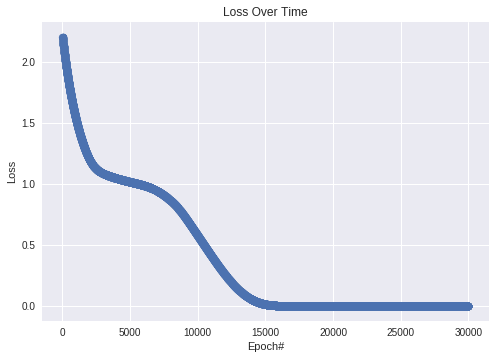

Test results
model prediction-
 [[0.]
 [1.]
 [1.]
 [0.]]


In [56]:
import torch
import matplotlib.pyplot as plt

dtype = torch.float

data = torch.tensor([[1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 1, 0]], dtype=dtype)


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 4, 2, 3, 1

# Create random Tensors to hold inputs and outputs
dataT = torch.t(data)
x = dataT[:,:-1]
y = dataT[:,-1].resize_((N,1))

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out),
)

criterion = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

lossOverTime = []
epochs = 30000
for t in range(epochs):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and save loss.
    loss = criterion(y_pred, y)
    lossOverTime.append(loss.detach().numpy())
    
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
print('Train results')
plt.scatter(range(epochs), lossOverTime)
plt.title('Loss Over Time')
plt.xlabel('Epoch#')
plt.ylabel('Loss')
plt.show()

y_test_pred = model(x)
print('Test results')
print('model prediction-\n', y_test_pred.detach().numpy())